# 自分で深層学習を実装してみる！！

# 3桁の２進数を、１０進数に変換するネット

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(sum_squared_error, y, teach, w):#ここのｙは、順伝播した結果のことなので、入力値xの情報は入っている。
    h = 1e-4#0.0001
    loss = sum_squared_error(y, teach)

    return (sum_squared_error(w+h)-sum_squared_error(w-h))/(2*h)

def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3層のネットワークを定義
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #バイアスを8つのニューロンにたす


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5つのニューロンにたすバイアス
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #バイアスを8つのニューロンにたす

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #これらはinitに書くべきなきがする
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y


dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #かんすうをいれなきゃだめ

for i in range(10):
    x, teach = make_input()
    y = forward(network, x)

    for num in range(len(network['W1'])):#ノードの個数
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, x, y, teach, network['W1'][num][i])#関数を引数に入れる場合は、関数名を引数に入れる。渡した材料で、関数の中で、入れた関数に引数を渡して使用する。

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # 微分して求めたそれぞれの傾きをもとに、重みを更新
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



[1 0 1]
[0.96167371 2.00432145 2.11397162 3.52794324 3.05661937 3.52794324
 3.99926711 3.99926711]
[0.94318288 1.96337539 2.08028877 3.46057753 3.00048128 3.46057753
 3.92067379 3.92067379]


TypeError: bibun_numerical_gradient() takes 4 positional arguments but 5 were given

In [ ]:
import numpy as np

def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result


# ごっちゃになってしまったので、作り直し

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y


def change_one_hot(lst):
    # 最大値を取得
    max_value = np.max(lst)

    # 最大値だけ1、残りを0の配列に置き換える
    result = np.zeros(8)
    result[np.argmax(lst)] = 1

    return result

def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    x  = np.array([x2,x1,x0])
    teach = np.array([[int(teach==0)],\
                      [int(teach==1)],\
                      [int(teach==2)],\
                      [int(teach==3)],\
                      [int(teach==4)],\
                      [int(teach==5)],\
                      [int(teach==6)],\
                      [int(teach==7)]])
    return x, teach



def init_network(): #3層のネットワークを定義
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
    network['b1'] = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]) #バイアスを8つのニューロンにたす


    network['W2'] = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
    network['b2'] = np.array([0.1, 0.2, 0.5, 0.3, 0.4])#5つのニューロンにたすバイアス
    network['W3'] = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                              [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
    network['b3'] = np.array([0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]) #バイアスを8つのニューロンにたす

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #これらはinitに書くべきなきがする
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    print(a3)
    y = softmax (a3)

    return y

def bibun_numerical_gradient(sum_squared_error ,ywh1, ywh2):#ここのｙは、順伝播した結果のことなので、入力値xの情報は入っている。
    h = 1e-4#0.0001

    return (sum_squared_error(ywh1)-sum_squared_error(ywh2))/(2*h)




dw1 = []
dw2 = []
dw3 = []
# print(network['W1'])
x, teach = make_input()
network = init_network()
# x = np.array([1, 0, 0])
print(x)
y = forward(network, x)
error = sum_squared_error(y, teach) #かんすうをいれなきゃだめ

for i in range(10):
    x, teach = make_input()
    y1 = forward(network, x)
    y2 = forward(network, x)

    for num in range(len(network['W1'])):#ノードの個数
        for i1 in range(len(network['W1'][1])):
            koubaiw1 = bibun_numerical_gradient(sum_squared_error, , network['W1'][num][i])#関数を引数に入れる場合は、関数名を引数に入れる。渡した材料で、関数の中で、入れた関数に引数を渡して使用する。

            dw11 = np.append(dw11, np.array[koubaiw1], axis(0))
        dw1 = np.append(dw11, np.array[koubaiw1], axis(0))

    for num in range(len(network['W2'])):
        for i2 in range(len(network['W2'][1])):
            koubaiw2 = bibun_numerical_gradient(error, network['W2'][num][i])

            dw21 = np.append(dw21, np.array[koubaiw1], axis(0))
        dw2 = np.append(dw21, np.array[koubaiw1], axis(0))

    for num in range(len(network['W3'])):
        for i3 in range(len(network['W3'][1])):
            koubaiw3 = bibun_numerical_gradient(error, network['W3'][num][i])

            dw31 = np.append(dw31, np.array[koubaiw3], axis(0))
        dw3 = np.append(dw31, np.array[koubaiw1], axis(0))

        # 微分して求めたそれぞれの傾きをもとに、重みを更新
    network['W1'] -= learning_rate * dW1
    network.W2 -= learning_rate * dW2
    network.W3 -= learning_rate * dW3
    dw1 = []
    dw2 = []
    dw3 = []


test_x, test_teach = make_input()
test = forward(network, test_x)



SyntaxError: invalid syntax (1216691841.py, line 118)

In [ ]:
import numpy as np
import pprint
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3]
    return network




w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
                              [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
                              [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4], 
                              ]) #3つのニューロンから、8つのニューロンに出力する際の重み
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #バイアスを8つのニューロンにたす


w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7],
                              [0.3, 0.6, 0.5, 0.6, 0.7],
                              [0.2, 0.5, 0.5, 0.6, 0.7]]) #8つのニューロンから5つのニューロンに出力する際の重み
    
b2 = np.array([[0.1, 0.2, 0.5, 0.3, 0.4]])#5つのニューロンにたすバイアス
w3 = np.array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
                    [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]) #5つのニューロンから8つのニューロンに出力する際の重み
b3 = np.array([[0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]]) #バイアスを8つのニューロンにたす

network = set_network(w1,b1,w2,b2,w3,b3)
pprint.pprint(network)
print("-------------------------------------------")
network[1][0][0] += 0.001
pprint.pprint(network)
print(len(network))

network1_zeros = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]

print(network1_zeros)



[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]),
 array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]]),
 array([[0.1, 0.4, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7],
       [0.3, 0.6, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7],
       [0.3, 0.6, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7],
       [0.3, 0.6, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.5, 0.6, 0.7]]),
 array([[0.1, 0.2, 0.5, 0.3, 0.4]]),
 array([[0.1, 0.3, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7],
       [0.2, 0.4, 0.3, 0.6, 0.5, 0.6, 0.7, 0.7]]),
 array([[0.1, 0.2, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]])]
-------------------------------------------
[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 

C:\Users\atusi\AppData\Local\Temp\ipykernel_10060\2871533648.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


------endnetwork-------
[array([[ 0.91601057, -0.11289233,  0.3895605 ,  1.74642967],
       [-1.2973239 , -0.19117202,  1.15014689, -0.593529  ],
       [-0.76008658,  0.44299842, -0.38669033,  1.07687628]]),
 array([[ 1.15041441, -1.56218678, -1.55735259, -0.1826046 ]]),
 array([[-0.71617975,  0.22220642, -1.88581007, -0.8665082 ],
       [ 1.03637018, -0.15964795,  0.04774965, -1.0074491 ],
       [-0.38493672,  0.07843412, -0.80855943,  0.16087438],
       [-0.42471569, -0.20625863,  0.11932025,  2.23731071]]),
 array([[-0.01102044, -0.86361736,  2.11311987, -0.66665385]]),
 array([[ 0.14768886, -1.38569603, -0.93916936,  0.13920191,  0.52217473,
         0.12117567, -0.08177568, -0.21291246],
       [-1.04547293, -0.50900672, -0.3257208 ,  0.74749829,  0.24297482,
        -1.24665765,  0.22916197, -0.27229429],
       [-0.73348533,  0.84471617,  1.0557999 ,  1.49138465, -0.88838646,
        -1.43937536,  0.31689437,  0.70169135],
       [-0.72588347, -0.02577218, -1.10184675, -1.0

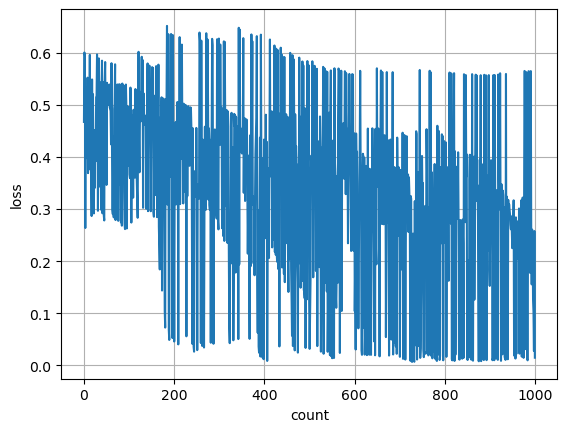

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 4
W2 = 4
W3 = 8
np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
# w1 = np.random.random([3,W1])*1.4
w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))

#バイアスを8つのニューロンにたす
b1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W1))
 #8つのニューロンから5つのニューロンに出力する際の重み
# w2 = np.random.random([W1,W2])*1.4
w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5つのニューロンにたすバイアス
b2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W2))
 #5つのニューロンから8つのニューロンに出力する際の重み
# w3 = np.random.random([W2,W3])*1.4
w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))

b3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(1, W3))

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.3
#学習回数を定義
learn = 1000


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

------endnetwork-------
[array([[ 1.71905133, -0.11289233,  0.3895605 ,  2.81754129],
       [-2.12369054, -0.19117202,  1.15014689, -1.04042223],
       [-1.75704822,  0.44299842, -0.38669033,  1.9991505 ]]),
 array([[ 1.68662109, -1.56218678, -1.55735259, -0.32414358]]),
 array([[-0.71617975,  0.22220642, -3.01728228, -1.92410727],
       [ 1.03637018, -0.15964795,  0.04774965, -1.0074491 ],
       [-0.38493672,  0.07843412, -0.80855943,  0.16087438],
       [-0.42471569, -0.20625863,  0.36653469,  4.63511041]]),
 array([[-0.01102044, -0.86361736,  5.19643236, -0.29581365]]),
 array([[ 0.14768886, -1.38569603, -0.93916936,  0.13920191,  0.52217473,
         0.12117567, -0.08177568, -0.21291246],
       [-1.04547293, -0.50900672, -0.3257208 ,  0.74749829,  0.24297482,
        -1.24665765,  0.22916197, -0.27229429],
       [-0.84119088,  1.5226439 ,  2.82298732,  2.26269807, -3.50877727,
        -2.46514434, -0.27647542, -0.3935065 ],
       [-1.85252466, -0.38606565, -4.23603843, -1.7

In [ ]:
w1 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/3), size=(3, W1))

#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1.4
 #8つのニューロンから5つのニューロンに出力する際の重み
# w2 = np.random.random([W1,W2])*1.4
w2 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W1), size=(W1, W2))

#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1.4
 #5つのニューロンから8つのニューロンに出力する際の重み
# w3 = np.random.random([W2,W3])*1.4
w3 = np.random.normal(loc=0.0, scale=np.sqrt(2.0/W2), size=(W2, W3))

b3 = np.random.random([1,W3])*1.4

print(w1)
print("----------------")
print(w2)
print("----------------")
print(w3)
print("----------------")


[[-0.50566976 -0.46949457  1.21447467  0.22524049]
 [-0.72265891  0.96644233 -0.672921    0.81835087]
 [ 0.08894562  0.53971448  0.60103594  0.68728319]]
----------------
[[-0.35688094 -1.10530158 -0.40614834 -0.14502933]
 [-1.75477595 -1.03492149 -0.41150472 -0.0478087 ]
 [-0.01076091  1.06628867 -1.64153947 -0.65955568]
 [ 0.35589285 -0.31792349 -0.67112507  0.02164712]]
----------------
[[ 0.38608677  0.02251818 -1.00725453 -0.72392858  0.11004827  0.29951017
   0.08708716  2.01021353]
 [ 0.21337835 -0.71611186  1.34188322  0.89084794 -0.15437601  0.09289953
  -0.94279085 -0.37384836]
 [ 0.1723423   0.40258611  0.42387757 -0.13624163  0.73960747  0.23786271
   0.28573132 -0.21294499]
 [ 0.43871179 -0.65009365  1.00010453  0.4129091  -0.17508371  0.64126816
   0.59811922 -0.02100454]]
----------------


In [ ]:
import numpy as np
import pprint


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #list
    return network






w1 = np.array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3], 
               [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2], 
               [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]) #3つのニューロンから、8つのニューロンに出力する際の重み
b1 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,]]) #バイアスを8つのニューロンにたす
w2 = np.array([[0.1, 0.4, 0.5, 0.6, 0.7],
               [0.2, 0.5, 0.1, 0.8, 0.1],
               [0.3, 0.6, 0.2, 0.5, 0.2],
               [0.2, 0.5, 0.4, 0.2, 0.3],
               [0.3, 0.6, 0.7, 0.3, 0.2],
               [0.2, 0.5, 0.3, 0.2, 0.5],
               [0.3, 0.6, 0.1, 0.1, 0.1],
               [0.2, 0.5, 0.1, 0.1, 0.2]]) #8つのニューロンから5つのニューロンに出力する際の重み
b2 = np.array([[0.1, 0.2, 0.2, 0.4, 0.4]])#5つのニューロンにたすバイアス
w3 = np.array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
               [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
               [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
               [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
               [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]) #5つのニューロンから8つのニューロンに出力する際の重み
b3 = np.array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]]) #バイアスを8つのニューロンにたす


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成

pprint.pprint(Network)










koubai_list1 = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]
koubai_list2 = np.array(koubai_list)






w1 = np.random.random([3,8])
b1 = np.random.random([1,8])
w2 = np.random.random([8,5])
b2 = np.random.random([1,5])
w3 = np.random.random([5,8])
b3 = np.random.random([1,8])

Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成

print("--------------------------------------------------")
pprint.pprint(Network)

print("--------------------------------------------------")
pprint.pprint(koubai_list1)

print("--------------------------------------------------")
pprint.pprint(koubai_list2)

[array([[0.1, 0.3, 0.5, 0.6, 0.7, 0.1, 0.2, 0.3],
       [0.2, 0.4, 0.6, 0.1, 0.3, 0.5, 0.6, 0.2],
       [0.3, 0.1, 0.2, 0.4, 0.2, 0.5, 0.1, 0.4]]),
 array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]]),
 array([[0.1, 0.4, 0.5, 0.6, 0.7],
       [0.2, 0.5, 0.1, 0.8, 0.1],
       [0.3, 0.6, 0.2, 0.5, 0.2],
       [0.2, 0.5, 0.4, 0.2, 0.3],
       [0.3, 0.6, 0.7, 0.3, 0.2],
       [0.2, 0.5, 0.3, 0.2, 0.5],
       [0.3, 0.6, 0.1, 0.1, 0.1],
       [0.2, 0.5, 0.1, 0.1, 0.2]]),
 array([[0.1, 0.2, 0.2, 0.4, 0.4]]),
 array([[0.1, 0.3, 0.3, 0.3, 0.2, 0.1, 0.5, 0.1],
       [0.2, 0.2, 0.1, 0.2, 0.1, 0.4, 0.2, 0.4],
       [0.6, 0.6, 0.5, 0.5, 0.5, 0.5, 0.3, 0.7],
       [0.3, 0.4, 0.3, 0.4, 0.7, 0.3, 0.4, 0.7],
       [0.1, 0.1, 0.7, 0.1, 0.3, 0.2, 0.1, 0.2]]),
 array([[0.3, 0.2, 0.2, 0.3, 0.7, 0.2, 0.1, 0.3]])]
--------------------------------------------------
[array([[0.01770847, 0.29120256, 0.12627468, 0.37546989, 0.75355643,
        0.30538809, 0.60758192, 0.3332781 ],
       [0.66263083, 0

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 4
W2 = 4
W3 = 8


#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 1000


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



NameError: name 'w1' is not defined

# ５月１９日　ここから誤差逆伝播、MNISTなどをやる

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4]) #　　　名前か番号か迷う
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y, a1, z1, a2, z2, a3 #xを入力したnetworkで順伝播して得られた出力結果




def backward(network, in_x, y, teach, a1, z1, a2, z2, a3):
    # 出力層の誤差
    delta3 = (y - teach)
    
    # 隠れ層2の誤差
    delta2 = np.dot(delta3, network[4].T) * (a2 > 0)
    
    # 隠れ層1の誤差
    delta1 = np.dot(delta2, network[2].T) * (a1 > 0)
    
    # 重みとバイアスの勾配
    grad_w3 = np.dot(z2.T, delta3)
    grad_b3 = np.sum(delta3, axis=0)
    grad_w2 = np.dot(z1.T, delta2)
    grad_b2 = np.sum(delta2, axis=0)
    grad_w1 = np.dot(in_x.T, delta1)
    grad_b1 = np.sum(delta1, axis=0)
    
    return [grad_w1, grad_b1, grad_w2, grad_b2, grad_w3, grad_b3]






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

W1 = 8
W2 = 8
W3 = 8


#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([3,W1])*0.3

#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*0.3
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*0.3

#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*0.3
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*0.3
b3 = np.random.random([1,W3])*0.3

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 2500


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった

                out_y, a1, z1, a2, z2, a3 = forward(Network, in_x)
                loss1 = sum_squared_error(out_y,teach) #出力と教師データを比較し、誤差を計算する

                gradients = backward(Network, in_x, out_y, teach, a1, z1, a2, z2, a3)

                for j in range(len(Network)):
                    Network[j] -= gradients[j] * learning_rate
    # out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



C:\Users\atusi\AppData\Local\Temp\ipykernel_28444\3183629809.py:131: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


ValueError: shapes (3,) and (1,8) not aligned: 3 (dim 0) != 1 (dim 0)

In [1]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(__file__))
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

NameError: name '__file__' is not defined

# MNISTをダウンロードして読み込む

In [15]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


if __name__ == '__main__':
    init_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [18]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
from PIL import Image



load_mnist()


((array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 (array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形
print(img.shape)  # (28, 28)

img_show(img)

print(x_train)
print(t_train)

5
(784,)
(28, 28)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


In [12]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 60000
W1 = 8
W2 = 8
W3 = 784


w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1





#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み

#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 10


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,x_train)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,t_train) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,x_train)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,t_train) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, x_test)
    loss = sum_squared_error(out3,t_test)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,x_test)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , t_test)
print("入力＝" , x_test)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



C:\Users\atusi\AppData\Local\Temp\ipykernel_3584\4958775.py:112: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


ValueError: shapes (60000,784) and (60000,8) not aligned: 784 (dim 1) != 60000 (dim 0)

C:\Users\atusi\AppData\Local\Temp\ipykernel_3584\3095451959.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


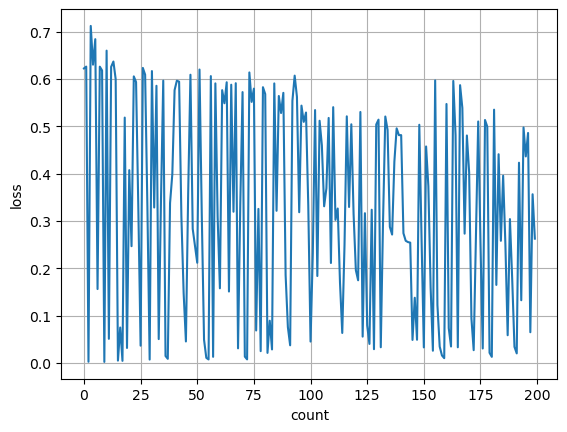

In [13]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.3
#学習回数を定義
learn = 200
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                kaisuu += 1
                print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
print(x_train.shape)

(60000, 784)


# ミニバッチ処理を追加する

### ↓バッチサイズ3のべた書きコード

C:\Users\atusi\AppData\Local\Temp\ipykernel_19392\3285463077.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


------endnetwork-------
[array([[ 0.75580095, -0.63965799,  2.26239255,  0.15207344,  0.67338329],
       [-0.02112293,  1.67884746, -0.02974748,  0.29938237,  1.92201446],
       [-1.06761042,  0.98289737,  1.50544272, -0.90527253, -0.25086413]]),
 array([[1.09605786, 0.36771004, 0.03025833, 0.60583717, 0.25066589]]),
 array([[ 0.7024734 ,  0.74159483,  0.78319252, -0.29192496, -0.57886184,
         1.40311727,  0.85968449],
       [-0.26499716,  0.95475489,  0.80152546,  1.3575149 ,  1.88197247,
         0.53115783,  0.24760973],
       [ 1.278568  , -0.54374598, -0.74907167, -0.24741482,  0.27281132,
        -0.99097228,  1.86804629],
       [ 0.62924145,  0.33535634,  0.97555751,  0.41625921, -0.12233106,
         1.34277668,  0.17695756],
       [ 0.0424414 ,  0.45093726, -0.39347424,  1.71836321, -0.13926514,
         1.12568527, -0.0583061 ]]),
 array([[ 0.49213415,  0.50657713,  1.56137753, -0.79386463,  0.5871677 ,
         1.08629051, -0.54439935]]),
 array([[ 0.40342023,  0.

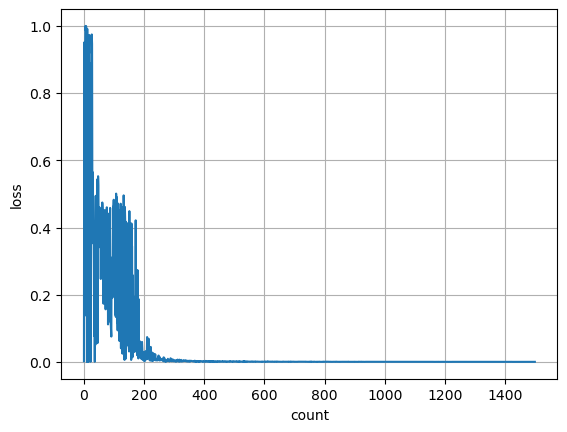

In [ ]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 1500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    in_x2, teach2 = make_input()#入力データと教師信号作成
    in_x3, teach3 = make_input()#入力データと教師信号作成
    in_x4, teach4 = make_input()#入力データと教師信号作成
    in_x5, teach5 = make_input()#入力データと教師信号作成
    in_x6, teach6 = make_input()#入力データと教師信号作成
    in_x7, teach7 = make_input()#入力データと教師信号作成
    in_x8, teach8 = make_input()#入力データと教師信号作成
    in_x9, teach9 = make_input()#入力データと教師信号作成
    in_x10, teach10 = make_input()#入力データと教師信号作成
    
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                out2_y1 = forward(Network1,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y1 = forward(Network1,in_x3)#そのNetworkで順伝播して出力を得る


                loss1_1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する
                loss1_2 = sum_squared_error(out2_y1,teach2) #出力と教師データを比較し、誤差を計算する
                loss1_3 = sum_squared_error(out3_y1,teach3) #出力と教師データを比較し、誤差を計算する
                loss1 = (loss1_1 + loss1_2 + loss1_3)/3 #ミニバッチ処理をするために誤差平均を計算


                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                out2_y2 = forward(Network2,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y2 = forward(Network2,in_x3)#そのNetworkで順伝播して出力を得る

                loss2_1 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する
                loss2_2 = sum_squared_error(out2_y2,teach2) #出力と教師データを比較し、誤差を計算する
                loss2_3 = sum_squared_error(out3_y2,teach3) #出力と教師データを比較し、誤差を計算する
                loss2 = (loss2_1 + loss2_2 + loss2_3)/3 #ミニバッチ処理をするために誤差平均を計算

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                # kaisuu += 1
                # print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

------endnetwork-------
[array([[-533.74733083, -533.31444394, -533.62161715, -533.51187296,
        -533.713272  ],
       [-533.72330113, -533.64145886, -533.02300626, -533.7748921 ,
        -532.99695915],
       [-533.04392545, -533.44930794, -533.07912743, -533.75389418,
        -533.3850628 ]]),
 array([[-533.88443696, -533.22020845, -533.41577205, -533.0653794 ,
        -533.18704498]]),
 array([[-533.63782725, -533.42276097, -533.17287255, -533.01259732,
        -533.02618394, -532.97501229, -533.50818059],
       [-533.91615817, -533.11189401, -533.9024056 , -533.13587594,
        -533.54774371, -533.57263892, -533.53469492],
       [-533.08960708, -533.44841179, -533.40348933, -533.58487667,
        -533.90657942, -533.47770027, -533.80694225],
       [-533.44319485, -533.3201663 , -533.31730656, -533.38705843,
        -533.6650504 , -533.13678566, -533.54409056],
       [-533.48291588, -533.57725754, -533.96251267, -533.30895984,
        -533.34737593, -533.22259486, -533.85

#### バッチサイズ増やした版

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
np.random.seed(49)  # 再現性のために乱数シードを設定


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(12)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    in_x2, teach2 = make_input()#入力データと教師信号作成
    in_x3, teach3 = make_input()#入力データと教師信号作成
    in_x4, teach4 = make_input()#入力データと教師信号作成
    in_x5, teach5 = make_input()#入力データと教師信号作成
    in_x6, teach6 = make_input()#入力データと教師信号作成
    in_x7, teach7 = make_input()#入力データと教師信号作成
    in_x8, teach8 = make_input()#入力データと教師信号作成
    in_x9, teach9 = make_input()#入力データと教師信号作成
    in_x10, teach10 = make_input()#入力データと教師信号作成
    
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
                out2_y1 = forward(Network1,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y1 = forward(Network1,in_x3)#そのNetworkで順伝播して出力を得る
                out4_y1 = forward(Network1,in_x4)#そのNetworkで順伝播して出力を得る
                out5_y1 = forward(Network1,in_x5)#そのNetworkで順伝播して出力を得る
                out6_y1 = forward(Network1,in_x6)#そのNetworkで順伝播して出力を得る
                out7_y1 = forward(Network1,in_x7)#そのNetworkで順伝播して出力を得る
                out8_y1 = forward(Network1,in_x8)#そのNetworkで順伝播して出力を得る
                out9_y1 = forward(Network1,in_x9)#そのNetworkで順伝播して出力を得る
                out10_y1 = forward(Network1,in_x10)#そのNetworkで順伝播して出力を得る

                loss1_1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する
                loss1_2 = sum_squared_error(out2_y1,teach2) #出力と教師データを比較し、誤差を計算する
                loss1_3 = sum_squared_error(out3_y1,teach3) #出力と教師データを比較し、誤差を計算する
                loss1_4 = sum_squared_error(out4_y1,teach4) #出力と教師データを比較し、誤差を計算する
                loss1_5 = sum_squared_error(out5_y1,teach5) #出力と教師データを比較し、誤差を計算する
                loss1_6 = sum_squared_error(out6_y1,teach6) #出力と教師データを比較し、誤差を計算する
                loss1_7 = sum_squared_error(out7_y1,teach7) #出力と教師データを比較し、誤差を計算する
                loss1_8 = sum_squared_error(out8_y1,teach8) #出力と教師データを比較し、誤差を計算する
                loss1_9 = sum_squared_error(out9_y1,teach9) #出力と教師データを比較し、誤差を計算する
                loss1_10 = sum_squared_error(out10_y1,teach10) #出力と教師データを比較し、誤差を計算する
                loss1 = (loss1_1 + loss1_2 + loss1_3 + loss1_4 + loss1_5 + loss1_6 + loss1_7 + loss1_8 + loss1_9 + loss1_10)/10 #ミニバッチ処理をするために誤差平均を計算



                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
                out2_y2 = forward(Network2,in_x2)#そのNetworkで順伝播して出力を得る
                out3_y2 = forward(Network2,in_x3)#そのNetworkで順伝播して出力を得る
                out4_y2 = forward(Network2,in_x4)#そのNetworkで順伝播して出力を得る
                out5_y2 = forward(Network2,in_x5)#そのNetworkで順伝播して出力を得る
                out6_y2 = forward(Network2,in_x6)#そのNetworkで順伝播して出力を得る
                out7_y2 = forward(Network2,in_x7)#そのNetworkで順伝播して出力を得る
                out8_y2 = forward(Network2,in_x8)#そのNetworkで順伝播して出力を得る
                out9_y2 = forward(Network2,in_x9)#そのNetworkで順伝播して出力を得る
                out10_y2 = forward(Network2,in_x10)#そのNetworkで順伝播して出力を得る

                loss2_1 = sum_squared_error(out_y2,teach) #出力と教師データを比較し、誤差を計算する
                loss2_2 = sum_squared_error(out2_y2,teach2) #出力と教師データを比較し、誤差を計算する
                loss2_3 = sum_squared_error(out3_y2,teach3) #出力と教師データを比較し、誤差を計算する
                loss2_4 = sum_squared_error(out4_y2,teach4) #出力と教師データを比較し、誤差を計算する
                loss2_5 = sum_squared_error(out5_y2,teach5) #出力と教師データを比較し、誤差を計算する
                loss2_6 = sum_squared_error(out6_y2,teach6) #出力と教師データを比較し、誤差を計算する
                loss2_7 = sum_squared_error(out7_y2,teach7) #出力と教師データを比較し、誤差を計算する
                loss2_8 = sum_squared_error(out8_y2,teach8) #出力と教師データを比較し、誤差を計算する
                loss2_9 = sum_squared_error(out9_y2,teach9) #出力と教師データを比較し、誤差を計算する
                loss2_10 = sum_squared_error(out10_y2,teach10) #出力と教師データを比較し、誤差を計算する
                loss2 = (loss2_1 + loss2_2 + loss2_3 + loss2_4 + loss2_5 + loss2_6 + loss2_7 + loss2_8 + loss2_9 + loss2_10)/10 #ミニバッチ処理をするために誤差平均を計算

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                # kaisuu += 1
                # print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, in_x)
    loss = sum_squared_error(out3,teach)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



C:\Users\atusi\AppData\Local\Temp\ipykernel_12596\1328073013.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


KeyboardInterrupt: 

#### ↓バッチサイズをすぐ指定できるように配列を使ったコードに変更

out_y1=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
out_y2=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
in_x=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)
teach=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)


C:\Users\atusi\AppData\Local\Temp\ipykernel_20848\2266690725.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


------endnetwork-------
[array([[ 0.12843965,  1.64873702,  1.5791994 ,  1.49302523],
       [-0.04581635,  1.20798272,  0.9657121 , -1.43086801],
       [ 2.18783907, -0.37014424, -0.23545339,  0.78476405]]),
 array([[ 0.04555449,  0.37866348, -0.66410333,  0.64681515]]),
 array([[ 0.20087832,  0.5638509 ,  0.55987824,  0.35913929,  1.54114979,
        -1.33922723],
       [-0.57843314, -0.80354197,  0.81021644, -0.2292991 ,  0.02939191,
         1.53864965],
       [-0.23502895,  0.85718085,  1.3161041 , -0.79438533,  0.40188571,
         1.48935008],
       [ 1.83183889,  0.4947148 ,  1.3011322 ,  1.42174128,  0.04996808,
         0.13492089]]),
 array([[ 0.27708329,  0.99958253, -1.14971636,  1.2853969 , -0.11258949,
         0.46675825]]),
 array([[ 0.6687548 ,  1.16724746, -0.20144315, -0.69788811,  0.64866817,
         1.42159667, -0.01066768, -0.17967399],
       [ 0.8592407 ,  1.14692912, -0.45540479,  0.48758151,  0.32890091,
        -0.31457706,  0.11104632,  0.77358705],
  

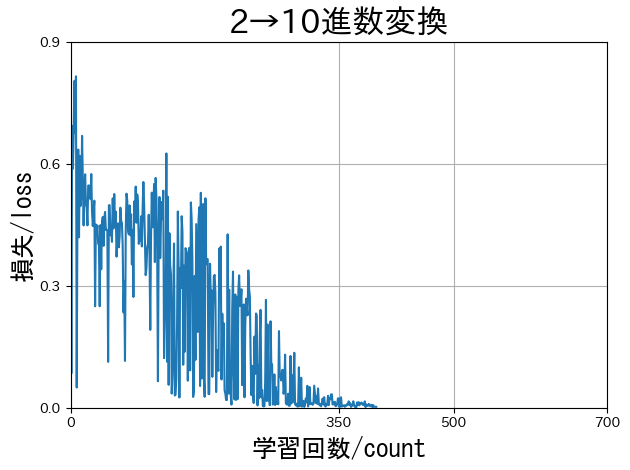

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Enum', 'ExitStack', 'Figure', 'FigureBase', 'FigureCanvasBase', 'FigureManagerBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotSpec', 'Text', 'TickHelper', 'Widget', '_REPL_DISPLAYHOOK', '_ReplDisplayHook', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_draw_if_interactive', '_backend_mod', '_copy_docstring_and_deprecators', '_docstring', '_draw_all_if_interactive', '_get_backend_mod', '_get_pyplot_commands', '_get_required_interactive_framework', '_interactive_bk', 

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 400
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
                    loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
                    loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    #作ったネットワークの性能検証（ただの順伝播をする）
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()
print(dir(plt))






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



In [ ]:
#ただの推論
in_x, teach = make_input()
A = forward(Network,in_x)
print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

NameError: name 'make_input' is not defined

In [ ]:
BATCH_SIZE = 10
# out_y1=np.zeros(shape=(BATCH_SIZE,1,2))
print(out_y1)
print(out_y1)
p = forward(Network1,in_x[batch_out1])
print(p)
p.shape
# print(in_x)
# dfd,deed = make_input()
# print(dfd)
# print(deed)
# print(teach)

[[1.39811166e-04 7.23633373e-08 2.09277739e-02 6.43306047e-04
  9.76966509e-01 1.17073645e-03 1.42457072e-04 9.33385039e-06]]
[[1.39811166e-04 7.23633373e-08 2.09277739e-02 6.43306047e-04
  9.76966509e-01 1.17073645e-03 1.42457072e-04 9.33385039e-06]]
[[1.19058643e-02 3.87332694e-04 1.11101385e-01 1.78801051e-02
  8.21402650e-01 2.16449021e-02 1.22601236e-02 3.41763777e-03]]


(1, 8)

# 損失関数を表示

out_y1=
[[0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 8)
out_y2=
[[0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 8)
in_x=
[[0. 0. 0.]]
(1, 3)
teach=
[[0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 8)
------endnetwork-------
[array([[0.96702984, 0.54723225, 0.97268436, 0.71481599],
       [0.69772882, 0.2160895 , 0.97627445, 0.00623026],
       [0.25298236, 0.43479153, 0.77938292, 0.19768507]]),
 array([[0.86299324, 0.98340068, 0.16384224, 0.59733394]]),
 array([[0.0089861 , 0.38657128, 0.04416006, 0.95665297, 0.43614665,
        0.94897731],
       [0.78630599, 0.8662893 , 0.17316542, 0.07494859, 0.60074272,
        0.16797218],
       [0.73338017, 0.40844386, 0.52790882, 0.93757158, 0.52169612,
        0.10819338],
       [0.15822341, 0.54520265, 0.52440408, 0.63761024, 0.40149544,
        0.64980511]]),
 array([[0.3969    , 0.62391611, 0.76740497, 0.17897391, 0.37557577,
        0.50253306]]),
 array([[0.68666708, 0.25367965, 0.55474086, 0.62493084, 0.89550117,
        0.36285359, 0.63755707, 0.1914464 ],
       [0.49779411, 0.1

C:\Users\atusi\AppData\Local\Temp\ipykernel_19380\831662619.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


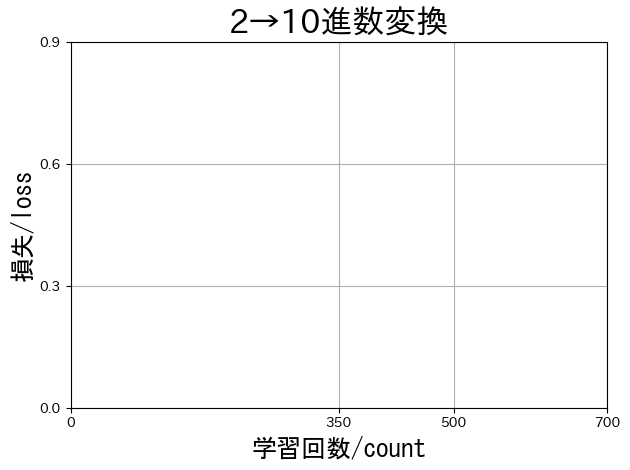

C:\Users\atusi\AppData\Local\Temp\ipykernel_19380\831662619.py:475: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Enum', 'ExitStack', 'Figure', 'FigureBase', 'FigureCanvasBase', 'FigureManagerBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MouseButton', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotSpec', 'Text', 'TickHelper', 'Widget', '_REPL_DISPLAYHOOK', '_ReplDisplayHook', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_draw_if_interactive', '_backend_mod', '_copy_docstring_and_deprecators', '_docstring', '_draw_all_if_interactive', '_get_backend_mod', '_get_pyplot_commands', '_get_required_interactive_framework', '_interactive_bk', 

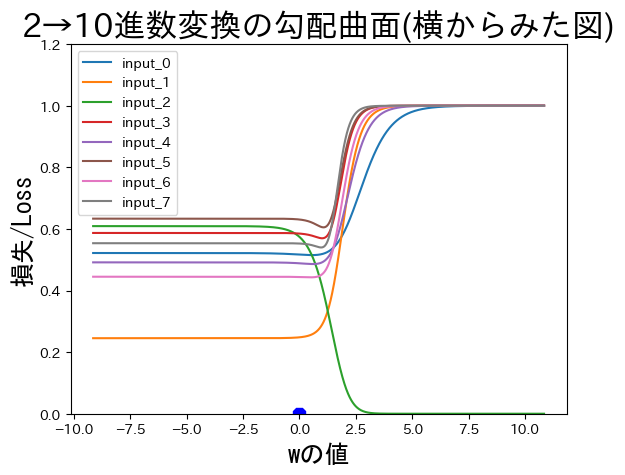

[-9.14455635 -9.13455635 -9.12455635 ... 10.82544365 10.83544365
 10.84544365]
[]


In [6]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
# np.random.seed(12)  # 再現性のために乱数シードを設定
np.random.seed(4)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.7
#学習回数を定義
learn = 550
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 1

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

# #繰り返し処理
# for i in range(learn):
#     for batch_in in range(BATCH_SIZE):

#         in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
#     for param in range(len(Network)): #パラメータの種類数だけ繰り返す
#         for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
#             for retsu in range(len(Network[param][gyou])): #列数サイズ取得

#                 Network1 = Network.copy()

#                 Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
#                 for batch_out1 in range(BATCH_SIZE):
#                     out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
#                     # print(out_y1[batch_out1])
#                     lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
#                     loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch1 = 0

#                 Network2 = Network.copy()
#                 Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
#                 for batch_out2 in range(BATCH_SIZE):
#                     out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
#                     lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
#                     loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch2 = 0

#                 koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
#                 # print("koubai=")
#                 # print(koubai)

#                 koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
#         Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

#     #作ったネットワークの性能検証（ただの順伝播をする）
#     in_x_pre, teach_pre = make_input()
#     out3 = forward(Network, in_x_pre)
#     loss = sum_squared_error(out3,teach_pre)    
#     COUNT.append(i)
#     LOSS.append(loss)
#     lossbatch1 = 0
#     lossbatch2 = 0

# A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
# print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()
print(dir(plt))






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する


def make_input0():
    x0 = 0
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach





def make_input1():
    x0 = 0
    x1 = 0
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

def make_input2():
    x0 = 0
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

def make_input3():
    x0 = 0
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach







def make_input4():
    x0 = 1
    x1 = 0
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach




def make_input5():
    x0 = 1
    x1 = 0
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach




def make_input6():
    x0 = 1
    x1 = 1
    x2 = 0
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach





def make_input7():
    x0 = 1
    x1 = 1
    x2 = 1
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach






IN = 3
W1 = 4
W2 = 5
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
# w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
# b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
# w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
# b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
# w3 = np.random.random([W2,W3])*1
# b3 = np.random.random([1,W3])*1



# #学習率を定義
# learning_rate = 0.8
# #学習回数を定義
# learn = 350
# kaisuu = 0
# #バッチサイズを設定
# BATCH_SIZE = 2

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)


GRAPH_COUNT = 2000
#微小量hを定義
h = 0.01#0.01
# 
# graph_w1 = np.arange(0, GRAPH_COUNT/100, 0.01) #0から/10まで、0.01間隔で配列を作成

nyuuryoku0 = np.full(GRAPH_COUNT, 0)
nyuuryoku1 = np.full(GRAPH_COUNT, 1)
nyuuryoku2 = np.full(GRAPH_COUNT, 2)
nyuuryoku3 = np.full(GRAPH_COUNT, 3)
nyuuryoku4 = np.full(GRAPH_COUNT, 4)
nyuuryoku5 = np.full(GRAPH_COUNT, 5)
nyuuryoku6 = np.full(GRAPH_COUNT, 6)
nyuuryoku7 = np.full(GRAPH_COUNT, 7)
graphloss = np.array([])
graph_w_1 = np.array([])
graph_w_2 = np.array([])
graph_w_3 = np.array([])
# graphloss = np.empty(0) # = []のnumpy版

# Network1[param][gyou][retsu] += 0.1

# out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
# loss1 = sum_squared_error(out_y1,teach)#誤差計算
# np.append = (graphloss, loss1) #lossのリストを作る

# draw_graph(nyuuryoku0 , graph_w1 , graphloss)





Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]


# 繰り返し処理


in_x ,teach = make_input0()
Network1 = Network.copy()
Network1[4][2][2] -= 50*0.2
for p in range(GRAPH_COUNT):

    Network1[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_1 = np.append(graph_w_1, Network1[4][2][2])
    out_y1 = forward(Network1,in_x) #そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach) #誤差計算
    graphloss = np.append(graphloss, loss1) #それをlossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_1, graphloss, label="input_0",)
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_1)
graphloss = np.array([])
graph_w_1 = np.array([])
print(graph_w_1)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


######################################################################################################################



in_x ,teach = make_input1()
Network1 = Network.copy()
Network1[4][2][2] -= 100*0.2
for p in range(GRAPH_COUNT):

    Network1[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_1 = np.append(graph_w_1, Network1[4][2][2])
    out_y1 = forward(Network1,in_x) #そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach) #誤差計算
    graphloss = np.append(graphloss, loss1) #それをlossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_1, graphloss, label="input_1")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_1)
graphloss = np.array([])
graph_w_1 = np.array([])
print(graph_w_1)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)

######################################################################################################################
in_x ,teach = make_input2()
Network2 = Network.copy()
Network2[4][2][2] -= 100*0.2
for i in range(GRAPH_COUNT):

    Network2[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_2 = np.append(graph_w_2, Network2[4][2][2])
    # print("Network2=") 
    # pprint.pprint(Network2)
    out_y1 = forward(Network2,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_2, graphloss, label="input_2")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_2)
graphloss = np.array([])
graph_w_2 = np.array([])
print(graph_w_2)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################

in_x ,teach = make_input3()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_3")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input4()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_4")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input5()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_5")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################



in_x ,teach = make_input6()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("Title", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_6")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
# plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################




in_x ,teach = make_input7()
Network3 = Network.copy()
Network3[4][2][2] -= 100*0.2
for j in range(GRAPH_COUNT):

    Network3[4][2][2] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る
    graph_w_3 = np.append(graph_w_3, Network3[4][2][2])
    # print("Network3=") 
    # pprint.pprint(Network3)
    out_y1 = forward(Network3,in_x)#そのNetworkで順伝播して出力を得る
    loss1 = sum_squared_error(out_y1,teach)#誤差計算
    # print(loss1)
    graphloss = np.append(graphloss, loss1) #lossのリストに追加

# plt.xticks([0, 50, 100]) # X軸の目盛りを指定
plt.title("2→10進数変換の勾配曲面(横からみた図)", fontsize=23)
plt.xlabel('wの値', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/Loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.plot(graph_w_3, graphloss, label="input_7")
plt.ylim(0, 1.2) # Y軸の範囲を指定
# plt.xlim(-300, 300) # Y軸の範囲を指定
plt.plot(0,0,marker='8', color= "blue", markersize=10)
plt.legend()
plt.show()
print(graph_w_3)
graphloss = np.array([])
graph_w_3 = np.array([])
print(graphloss)
# fig = plt.figure()
# print(graphloss)
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)


###########################################################################################################################





















# #繰り返し処理
# for i in range(learn):
#     for batch_in in range(BATCH_SIZE):

#         in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
#     for param in range(len(Network)): #パラメータの種類数だけ繰り返す
#         for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
#             for retsu in range(len(Network[param][gyou])): #列数サイズ取得

#                 Network1 = Network.copy()

#                 Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
#                 for batch_out1 in range(BATCH_SIZE):
#                     out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
#                     # print(out_y1[batch_out1])
#                     lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
#                     loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch1 = 0

#                 Network2 = Network.copy()
#                 Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
#                 for batch_out2 in range(BATCH_SIZE):
#                     out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
#                     lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
#                     loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
#                 lossbatch2 = 0

#                 koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
#                 # print("koubai=")
#                 # print(koubai)

#                 koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
#         Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

#     #作ったネットワークの性能検証（ただの順伝播をする）
#     in_x_pre, teach_pre = make_input()
#     out3 = forward(Network, in_x_pre)
#     loss = sum_squared_error(out3,teach_pre)    
#     COUNT.append(i)
#     LOSS.append(loss)

# A = forward(Network,in_x_pre)

# print("------endnetwork-------")
# pprint.pprint(Network)
# print("教師＝" , teach)
# print("入力＝" , in_x)
# # A = change_one_hot(A)
# print("結果（確率）" , np.round(A*100,1))




# for i in range(GRAPH_COUNT):

#     Network1 = Network.copy()

#     Network1[0][0][0] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る 
#     out_y1 = forward(Network1,in_x)#そのNetworkで順伝播して出力を得る
#     loss1 = sum_squared_error(out_y1,teach)#誤差計算
#     np.append = (graphloss, loss1) #lossのリストに追加


# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(graph_w1, nyuuryoku0, graphloss)









# plt.plot(COUNT, LOSS)
# plt.xlabel("count")
# plt.ylabel("loss")
# plt.grid()
# plt.show()






#     # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
#     # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
#     # その二つの値を教師データと比較し、誤差を計算する
#     # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

#     # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

#     # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

#     # 更新後のパラメータで新たなNetworkを作成する



In [2]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)+ np.cos(Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)

plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np

hoge =np.array([])
np.append(hoge, 1)

array([1.])

In [ ]:
print(np.append([-3, -2, -1], 1))
# [-3 -2 -1  0  1  2

TypeError: 'tuple' object is not callable

# ごちゃごちゃしていたので整頓

out_y1=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
out_y2=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
in_x=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)
teach=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)


C:\Users\atusi\AppData\Local\Temp\ipykernel_16836\2696146090.py:142: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


------endnetwork-------
[array([[ 0.12843965,  1.64873702,  1.5791994 ,  1.49302523],
       [-0.04581635,  1.20798272,  0.9657121 , -1.43086801],
       [ 2.18783907, -0.37014424, -0.23545339,  0.78476405]]),
 array([[ 0.04555449,  0.37866348, -0.66410333,  0.64681515]]),
 array([[ 0.20087832,  0.5638509 ,  0.55987824,  0.35913929,  1.54114979,
        -1.33922723],
       [-0.57843314, -0.80354197,  0.81021644, -0.2292991 ,  0.02939191,
         1.53864965],
       [-0.23502895,  0.85718085,  1.3161041 , -0.79438533,  0.40188571,
         1.48935008],
       [ 1.83183889,  0.4947148 ,  1.3011322 ,  1.42174128,  0.04996808,
         0.13492089]]),
 array([[ 0.27708329,  0.99958253, -1.14971636,  1.2853969 , -0.11258949,
         0.46675825]]),
 array([[ 0.6687548 ,  1.16724746, -0.20144315, -0.69788811,  0.64866817,
         1.42159667, -0.01066768, -0.17967399],
       [ 0.8592407 ,  1.14692912, -0.45540479,  0.48758151,  0.32890091,
        -0.31457706,  0.11104632,  0.77358705],
  

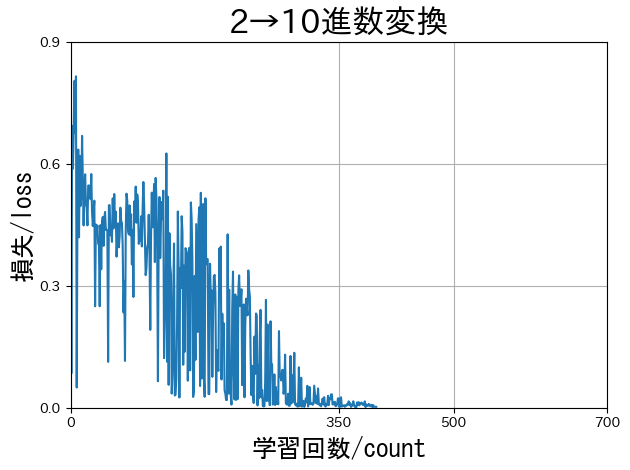

In [6]:
import numpy as np
import pprint
# import matplotlib～の前に！
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    
    ####################
    # aはその層の入力の和のことです
    # bはバイアスのことです
    # zは出力です

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    print(a1)
    print(in_x)
    y = softmax (a3)

    return y , W1, W2, W3, b1, b2, b3, #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 400
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
                    loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
                    loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    #作ったネットワークの性能検証（ただの順伝播をする）
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()


Network1 = Network.copy()



In [ ]:
AEL = 3
B= np.array([[10,10,-20, 10],[-20,10,20,20],[5,2,2]])

In [3]:
import numpy as np

a = np.array([1, 2])

b = np.array([4, 3])

f = np.dot(a, b) # まずは２次元ベクトル同士の内積から。
print(f)
s = np.dot(a, a) # これでベクトルのノルムの２乗が出る。
print(s)

10
5


# 誤差逆伝播するぞ　まだできてない

In [8]:
import numpy as np
import pprint
# import matplotlib～の前に！
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(12)  # 再現性のために乱数シードを設定

#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])
    
    ##############################
    # aはその層の入力の和のことです
    # bはバイアスのことです
    # zは出力です
    # wは重み
    ##############################

    z1 = np.dot(in_x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    y = softmax (z3)

    return y, W1, W2, W3, b1, b2, b3, a1, a2, z1, z2, z3 #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 4
W2 = 6
W3 = 8
# np.random.seed(49)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 400
kaisuu = 0
#バッチサイズを設定
BATCH_SIZE = 3

out_y1 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y1=')
print(out_y1)
print(out_y1.shape)
out_y2 = np.zeros(shape=(BATCH_SIZE,8))
print('out_y2=')
print(out_y2)
print(out_y2.shape)
lossbatch1 = 0
# print(lossbatch1)
# print(lossbatch1.shape)
lossbatch2 = 0
# print(lossbatch2)
# print(lossbatch2.shape)
in_x = np.zeros(shape=(BATCH_SIZE,3))
print('in_x=')
print(in_x)
print(in_x.shape)
teach = np.zeros(shape=(BATCH_SIZE,8))
print('teach=')
print(teach)
print(teach.shape)



Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    for batch_in in range(BATCH_SIZE):

        in_x[batch_in], teach[batch_in] = make_input()#バッチサイズ分の入力データ作成してリストに収める
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                Network1 = Network.copy()

                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                
                for batch_out1 in range(BATCH_SIZE):
                    out_y1[batch_out1] = forward(Network1,in_x[batch_out1])#そのNetworkで順伝播して出力を得る
                    # print(out_y1[batch_out1])
                    lossbatch1 += sum_squared_error(out_y1[batch_out1],teach[batch_out1]) #出力と教師データを比較し、誤差を計算する
                    loss1 = lossbatch1/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch1 = 0

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                for batch_out2 in range(BATCH_SIZE):
                    out_y2[batch_out2] = forward(Network2,in_x[batch_out2])#そのNetworkで順伝播して出力を得る
                    lossbatch2 += sum_squared_error(out_y2[batch_out2],teach[batch_out2]) #出力と教師データを比較し、誤差を計算する
                    loss2 = lossbatch2/BATCH_SIZE #ミニバッチ処理をするために誤差平均を計算
                lossbatch2 = 0

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）
                # print("koubai=")
                # print(koubai)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    #作ったネットワークの性能検証（ただの順伝播をする）
    in_x_pre, teach_pre = make_input()
    out3 = forward(Network, in_x_pre)
    loss = sum_squared_error(out3,teach_pre)    
    COUNT.append(i)
    LOSS.append(loss)
    lossbatch1 = 0
    lossbatch2 = 0

A = forward(Network,in_x_pre)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.title("2→10進数変換", fontsize=23)
plt.xlabel('学習回数/count', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.ylabel('損失/loss', fontname='MS Gothic', fontsize=18) #japanize-matplotlibを使用する
plt.xlim(0, 250) # X軸の範囲を指定
plt.ylim(0, 0.9) # Y軸の範囲を指定
plt.xticks([0, 350, 500, 700]) # X軸の目盛りを指定
plt.yticks([0, 0.3, 0.6, 0.9]) # Y軸の目盛りを指定

plt.tight_layout() #グラフがはみ出ないようにうまく調整してくれる
plt.grid()
plt.show()


Network1 = Network.copy()



out_y1=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
out_y2=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)
in_x=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)
teach=
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
(3, 8)


C:\Users\atusi\AppData\Local\Temp\ipykernel_16836\1112939884.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 1.

In [16]:
import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    z1 = np.dot(in_x, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3
    # print(a3)
    y = softmax (z3)

    return y, W1, W2, W3, b1, b2, b3, z1, z2, z3, a1, a2 #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)




def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach

IN = 3
W1 = 5
W2 = 7
W3 = 8
# np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-4#0.0001
#学習率を定義
learning_rate = 0.8
#学習回数を定義
learn = 1500
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理

in_x, teach = make_input()#入力データと教師信号作成

out_y1 = forward(Network,in_x)#順伝播、返り値：12個のパラメータ y,w123,b123,z123,a12の順
# print(type(out_y1))
# print("out_y1=")
# pprint.pprint(out_y1)

#偏微分係数を求める
loss1 = sum_squared_error(out_y1,teach) #出力と教師データを比較し、誤差を計算する

koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）


koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

out3 = forward(Network, in_x)
loss = sum_squared_error(out3,teach)    
COUNT.append(i)
LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



<class 'tuple'>
out_y1=
(array([[0.43866414, 0.01547557, 0.00239218, 0.108173  , 0.01560239,
        0.00433173, 0.02738748, 0.38797351]]),
 array([[0.05050382, 0.24091582, 0.4045958 , 0.63641442, 0.51951048],
       [0.45429992, 0.06255539, 0.1209482 , 0.59377377, 0.8942219 ],
       [0.62802453, 0.4296146 , 0.63136014, 0.48892028, 0.95608371]]),
 array([[0.03361718, 0.26302485, 0.22019206, 0.35849884, 0.55434742,
        0.49581881, 0.28168559],
       [0.43566025, 0.34765949, 0.73946335, 0.72620732, 0.50042725,
        0.66893665, 0.74793199],
       [0.00725746, 0.0744729 , 0.50896702, 0.84042843, 0.48495069,
        0.1470229 , 0.82598371],
       [0.07826414, 0.58356267, 0.02663729, 0.96110122, 0.48033262,
        0.33993154, 0.81701852],
       [0.30633936, 0.9982633 , 0.90010159, 0.24152589, 0.42594673,
        0.81636508, 0.56789234]]),
 array([[0.81052595, 0.4157205 , 0.54880689, 0.49651491, 0.19281327,
        0.87708397, 0.39330066, 0.47331349],
       [0.41923533, 0.609321

C:\Users\atusi\AppData\Local\Temp\ipykernel_16836\3068260544.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
C:\Users\atusi\AppData\Local\Temp\ipykernel_16836\3068260544.py:49: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return 0.5 * np.sum((y-t)**2)


ValueError: operands could not be broadcast together with shapes (12,) (8,) 

# 誤差逆伝播できないから、工夫なくMNISTしてみる

In [1]:
##############################################################################################################
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = "."
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name

    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0"}
    request = urllib.request.Request(url_base+file_name, headers=headers)
    response = urllib.request.urlopen(request).read()
    with open(file_path, mode='wb') as f:
        f.write(response)
    print("Done")

def download_mnist():
    for v in key_file.values():
       _download(v)

def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")

    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name

    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")

    return data

def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])

    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNISTデータセットの読み込み

    Parameters
    ----------
    normalize : 画像のピクセル値を0.0~1.0に正規化する
    one_hot_label :
        one_hot_labelがTrueの場合、ラベルはone-hot配列として返す
        one-hot配列とは、たとえば[0,0,1,0,0,0,0,0,0,0]のような配列
    flatten : 画像を一次元配列に平にするかどうか

    Returns
    -------
    (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return dataset['train_img'], dataset['train_label'], dataset['test_img'], dataset['test_label']


if __name__ == '__main__':
    init_mnist()

    # coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np
from PIL import Image



load_mnist()

##############################################################################################################



import numpy as np
import pprint
import matplotlib.pyplot as plt


#ニューラルネットワークを作る関数
def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
    sum_exp_a = np.sum(exp_a)
    y = exp_a /sum_exp_a
    return y



def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    a1 = np.dot(in_x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    # print(a3)
    y = softmax (a3)

    return y #xを入力したnetworkで順伝播して得られた出力結果






def sum_squared_error(y, t):#２乗和誤差
    return 0.5 * np.sum((y-t)**2)

def bibun_numerical_gradient(out_y1, out_y2):
    return (out_y1 - out_y2)/(2*h)


def make_input():
    x0 = int(np.random.random()<0.5)
    x1 = int(np.random.random()<0.5)
    x2 = int(np.random.random()<0.5)
    teach = x2*4 + x1*2 + x0
    in_x  = np.array([x2,x1,x0])
    teach = np.array([int(teach==0),
                      int(teach==1),
                      int(teach==2),
                      int(teach==3),
                      int(teach==4),
                      int(teach==5),
                      int(teach==6),
                      int(teach==7)])
    return in_x, teach


x_train, t_train, x_test, t_test = load_mnist(flatten=True, normalize=True, one_hot_label=True)




IN = 784
W1 = 5
W2 = 7
W3 = 10
np.random.seed(42)  # 再現性のために乱数シードを設定

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])*1
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])*1
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])*1
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])*1
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])*1
b3 = np.random.random([1,W3])*1


#微小量hを定義
h = 1e-2#0.0001
#学習率を定義
learning_rate = 0.3
#学習回数を定義
learn = 200
kaisuu = 0


Network = set_network(w1,b1,w2,b2,w3,b3)#初期ネットワーク作成
# in_x, teach = make_input()#入力データと教師信号作成
# out = forward(Network, in_x)#順伝播
# error = sum_squared_error(out,teach) #出力と教師を比較して誤差を計算
# koubai_list = [[[[0] * len()] * len(Network[])] * 1] * len(Network) # koubai_list = np.zeros_like(Network)#koubai_list = [[[]]] #np.zerosのほうがよさそうなので変えた

# koubai_list = [np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)] #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに
# koubai_list = np.array(koubai_list)
# print("firstnetwork")
# pprint.pprint(Network)

COUNT=[]
LOSS=[]

#繰り返し処理
for i in range(learn):
    in_x, teach = make_input()#入力データと教師信号作成
    # (in_x, teach), (x_test, t_test) = load_mnist(flatten=True, one_hot_label=True)
    # print("勾配リストによって更新された時のNetwork＝")
    # pprint.pprint(Network)
    
    for param in range(len(Network)): #パラメータの種類数だけ繰り返す　本来はlen(Network)的な感じになる　やり方わからなかった
        for gyou in range(len(Network[param])): #w1的な感じつまり行数サイズ取得 network0番目の、行数を取得？
            for retsu in range(len(Network[param][gyou])): #列数サイズ取得

                # Network1 = Network #コピーを作る
                Network1 = Network.copy()
                # print(Network1[param][gyou][retsu])
                Network1[param][gyou][retsu] += h #あるひとつのパラメータだけちょっと増やしたNetworkを作る ここはこうか？→（リストw1の一つの要素だけに+hしてから、set_networkで作る？そんなきがする）
                # pprint.pprint(Network1)
                out_y1 = forward(Network1,x_train)#そのNetworkで順伝播して出力を得る
                loss1 = sum_squared_error(out_y1,t_train) #出力と教師データを比較し、誤差を計算する

                Network2 = Network.copy()
                Network2[param][gyou][retsu] -= h #あるひとつのパラメータだけちょっと減らしたNetworkを作る
                out_y2 = forward(Network2, x_train)#そのNetworkで順伝播して出力を得る
                loss2 = sum_squared_error(out_y2,t_train) #出力と教師データを比較し、誤差を計算する

                koubai = bibun_numerical_gradient(loss1,loss2) #２つの誤差から、勾配を求める（損失関数の微分値が求まる）

                kaisuu += 1
                print(kaisuu)

                koubai_list[param][gyou][retsu] = koubai #勾配情報をリストに保存する　これを繰り返すと、各パラメータの勾配のリストが完成する
        Network[param] -= koubai_list[param] * learning_rate # Network -= koubai_list * learning_rate #パラメータを更新

    out3 = forward(Network, x_test)
    loss = sum_squared_error(out3,t_test)    
    COUNT.append(i)
    LOSS.append(loss)

A = forward(Network,in_x)

print("------endnetwork-------")
pprint.pprint(Network)
print("教師＝" , teach)
print("入力＝" , in_x)
# A = change_one_hot(A)
print("結果（確率）" , np.round(A*100,1))

plt.plot(COUNT, LOSS)
plt.xlabel("count")
plt.ylabel("loss")
plt.grid()
plt.show()






    # あるひとつのパラメータだけちょっと増やしたNetworkを作って、順伝播する
    # あるひとつのパラメータだけちょっと減らしたNetworkを作って、順伝播する
    # その二つの値を教師データと比較し、誤差を計算する
    # それらの変化量から、ある一つのパラメータの勾配を求める。そしてリストにまとめる

    # これらをすべてのパラメータで一つ一つやって(for文)、勾配のリストを完成させる

    # 勾配のリストに学習率をかけた者を、今のパラメータから引いて更新する

    # 更新後のパラメータで新たなNetworkを作成する



Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


C:\Users\atusi\AppData\Local\Temp\ipykernel_3024\4124814338.py:267: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  koubai_list = np.array([np.zeros_like(w1), np.zeros_like(b1), np.zeros_like(w2), np.zeros_like(b2), np.zeros_like(w3), np.zeros_like(b3)]) #なんでも配列のlistナノで、計算用の形でないので、np.arrayに


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


: 

: 

In [20]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=True)

ValueError: not enough values to unpack (expected 4, got 2)

# 誤差逆伝播実験
## ①順伝播してネットワークを用意する

In [1]:
# 入力３こ、隠れ層１層目３個、隠れそう２層目３個、出力層２個
import pprint
import numpy as np
np.random.seed(42)  # 再現性のために乱数シードを設定


def set_network(w1,b1,w2,b2,w3,b3):
    network = [w1,b1,w2,b2,w3,b3] #listは中身何でもよし配列なので、arrayは数値の配列
    return network

def forward(network, in_x):
    W1, W2, W3 = np.array(network[0]), np.array(network[2]), np.array(network[4])
    b1, b2, b3 = np.array(network[1]), np.array(network[3]), np.array(network[5])

    z1 = np.dot(in_x, W1) + b1
    fz1 = sigmoid(z1) #その層のすべてのニューロンの入力にシグモイド関数をかけて出力を作成する。
    z2 = np.dot(fz1, W2) + b2
    fz2 = sigmoid(z2)
    z3 = np.dot(fz2, W3) + b3
    # print(a3)
    fz3 = sigmoid (z3)

    return z1, fz1, z2, fz2, z3, fz3 #xを入力したnetworkで順伝播して得られた出力結果

# def softmax(a):
#     c = np.max(a)
#     exp_a = np.exp(a - c)#最大値で引くことで、オーバーフローを防ぐ
#     sum_exp_a = np.sum(exp_a)
#     y = exp_a /sum_exp_a
#     return y

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# def relu(x):
#     return np.maximum(0, x)

def identity_function(x):#恒等関数
    return x 


in_x = np.random.random([1,3])*1
teach = np.array([[0.5,0.7]])

IN = 3
W1 = 3
W2 = 3
W3 = 2

#初期の重みとバイアスを記入
#3つのニューロンから、8つのニューロンに出力する際の重み
w1 = np.random.random([IN,W1])
#バイアスを8つのニューロンにたす
b1 = np.random.random([1,W1])
 #8つのニューロンから5つのニューロンに出力する際の重み
w2 = np.random.random([W1,W2])
#5つのニューロンにたすバイアス
b2 = np.random.random([1,W2])
 #5つのニューロンから8つのニューロンに出力する際の重み
w3 = np.random.random([W2,W3])
b3 = np.random.random([1,W3])

pprint.pprint(w1)
pprint.pprint(b1)
pprint.pprint(w2)
pprint.pprint(b2)
pprint.pprint(w3)
pprint.pprint(b3)

Network = set_network(w1,b1,w2,b2,w3,b3)
z1, fz1, z2, fz2, z3, fz3_y = forward(Network, in_x)
print('----------------')
pprint.pprint(z1)
pprint.pprint(fz1)
pprint.pprint(z2)
pprint.pprint(fz2)
pprint.pprint(z3)
pprint.pprint(fz3_y)
pprint.pprint(teach)

grad_list=[]


array([[0.59865848, 0.15601864, 0.15599452],
       [0.05808361, 0.86617615, 0.60111501],
       [0.70807258, 0.02058449, 0.96990985]])
array([[0.83244264, 0.21233911, 0.18182497]])
array([[0.18340451, 0.30424224, 0.52475643],
       [0.43194502, 0.29122914, 0.61185289],
       [0.13949386, 0.29214465, 0.36636184]])
array([[0.45606998, 0.78517596, 0.19967378]])
array([[0.51423444, 0.59241457],
       [0.04645041, 0.60754485],
       [0.17052412, 0.06505159]])
array([[0.94888554, 0.96563203]])
----------------
array([[1.63019002, 1.10932813, 1.52170795]])
array([[0.83619567, 0.75200383, 0.82078985]])
array([[1.04875149, 1.4983768 , 1.39929464]])
array([[0.74053508, 0.81733226, 0.80207193]])
array([[1.50443221, 1.95307786]])
array([[0.81823459, 0.87578186]])
array([[0.5, 0.7]])


![スクリーンショット 2023-06-26 174333.png](<attachment:スクリーンショット 2023-06-26 174333.png>)
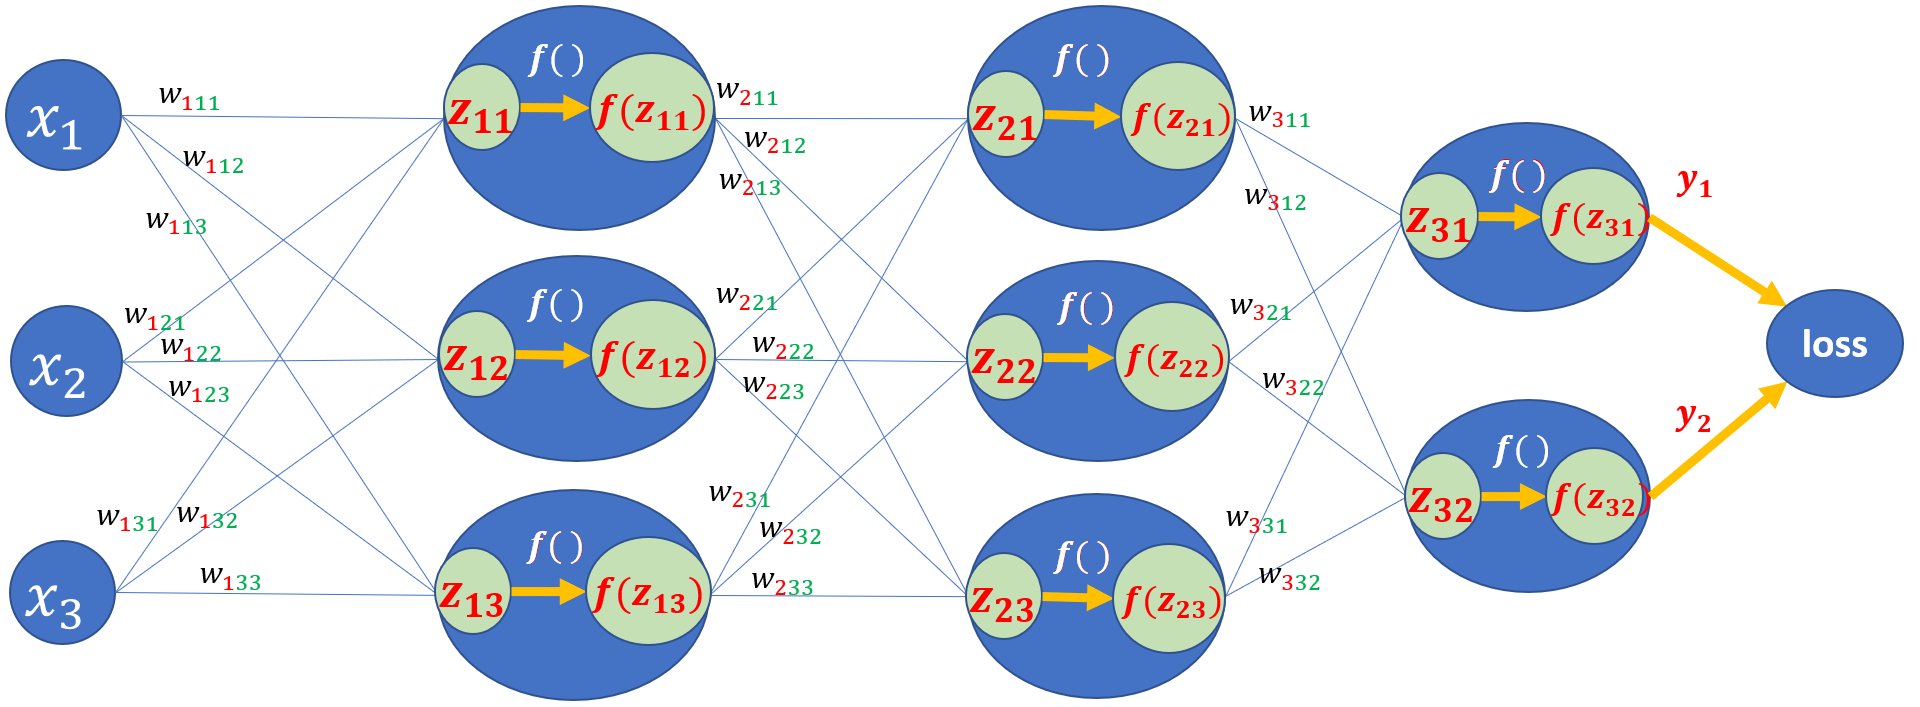

## ②逆伝播する

In [ ]:
x[] #ネットワークへの入力値格納配列
w[[[]]] #重みの値格納配列 
z[[]] #ニューロンへの入力値格納配列
fz[[]] #入力値格納配列

def grad_sigmoidgrad():
    gradsigmoid

def grad_get_keisuu():
    get_keisuu


In [ ]:
#後ろから一層目の計算
aloss_aw311 = aloss_ay1 * ay1_az31 * az31_aw311


In [2]:
#後ろから一層目の勾配を計算
grad_list[0] = np.dot(fz3_y - teach, z3)

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [4]:
aloss_ay1 = (y[0][0] - teach[0][0])
print(aloss_ay1)

aloss_ay2 = (y[0][1] - teach[0][1])
print(aloss_ay2)

0.31823459474885285
0.17578186401408458


In [3]:
#aloss_aw311を求める
ay1_az31 = (1-y[0][0])*(y[0][0])
fz31 = ay1_az31
az31_aw311 = z2[0][0]
#
fz21 = az31_aw311
#
aloss_aw311 = aloss_ay1 * ay1_az31 * az31_aw311 #w311の勾配の値
print(aloss_aw311)

0.036643333170811185


In [8]:
#aloss_aw312を求める
ay2_az32 = (1-y[0][1])*(y[0][1])
aloss_aw312 = aloss_ay2 * ay2_az32 * az32_aw312 #w311の勾配の値
print(aloss_aw312)

0.7759585590012584
0.37471406119809547


In [11]:
#aloss_aw321を求める
ay1_aw321 = out[3][0][1] #f(z22)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay1_aw321)
aloss_aw321 = aloss_ay1 * ay1_aw321
print(aloss_aw321)

0.7117978458730034
0.41038182753445474


In [13]:
#aloss_aw322を求める
ay2_aw322 = out[3][0][1] #f(z22)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay2_aw322)
aloss_aw322 = aloss_ay2 * ay2_aw322
print(aloss_aw322)

0.7117978458730034
0.34373054911904977


In [14]:
#aloss_aw331を求める
ay1_aw331 = out[3][0][2] #f(z23)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay1_aw331)
aloss_aw331 = aloss_ay1 * ay1_aw331
print(aloss_aw331)

0.7983919757110274
0.4603070379895373


In [15]:
#aloss_aw332を求める
ay2_aw332 = out[3][0][2] #f(z23)のこと　forwardの戻り値4番目の1番目の配列の2番目の値がf(z22)であるため
print(ay2_aw332)
aloss_aw332 = aloss_ay2 * ay2_aw332
print(aloss_aw332)

0.7983919757110274
0.3855472643174558


In [32]:
in_x = np.random.random([1,3])*1
print(in_x)

[[0.25877998 0.66252228 0.31171108]]


In [ ]:
def loss_derivative(Y, T):
    for retsu_size in range(len(fz3_y[0])):
        loss = Y[0][retsu_size] - T[0][retsu_size]
    return loss
# 出力と教師はともにただの列ベクトルだkara

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return (1 - sigmoid(x)) * sigmoid(x)

In [4]:
list1 = [['python', 'list'], ['length', 'two', ' demension']]
length = 0

for x in list1:
    length += len(x)  #取り出した要素の長さを足していく

print('list1の長さは{}です'.format(length))

list1の長さは5です
